In [1]:
import finlab

In [2]:
finlab.login(api_token='ID0hv1JVLP3bs86Qg/xslT1fwKjN0bclQVRCH7eQiAYh3e5/XNh77u3zaPDOOGJQ#vip_m')

輸入成功!


In [3]:
from finlab import data
from finlab.backtest import sim
import pandas as pd
import numpy as np

In [25]:
# with data.universe('TSE_OTC'):
with data.universe(market ='STOCK_FUTURE'):

    benchmark = data.get('benchmark_return:發行量加權股價報酬指數', save_to_storage=True)

    close = data.get('price:收盤價')

    foreign_trust_surplus = data.get('institutional_investors_trading_summary:外陸資賣出股數(不含外資自營商)')	
    invest_trust_surplus = data.get('institutional_investors_trading_summary:投信買進股數')	
    self_broker_surplus = data.get('institutional_investors_trading_summary:自營商買賣超股數(自行買賣)')

    volume = data.get('price:成交股數', save_to_storage=True)

score = data.get('etl:finlab_tw_stock_market_ind')['score']


In [26]:
invest_trust_surplus

,0050,0056,0061,006205,006206,006207,00636,00639,00643,00878,...,8299,8358,8436,8454,8942,9904,9914,9938,9939,9945
date,,,,,,,,,,,,,,,,,,,,,
2012-05-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,73000.0,0.0,NaN,NaN,0.0,1273000.0,113000.0,0.0,79000.0,348000.0
2012-05-03,0.0,0.0,2524000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,85000.0,0.0,NaN,NaN,0.0,1007342.0,202000.0,0.0,26286.0,527000.0
2012-05-04,319000.0,0.0,180000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,751000.0,0.0,NaN,NaN,0.0,350000.0,159000.0,0.0,0.0,483000.0
2012-05-07,1500000.0,0.0,1000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,311000.0,0.0,NaN,NaN,0.0,350000.0,258000.0,0.0,0.0,264000.0
2012-05-08,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,281000.0,0.0,NaN,NaN,0.0,500000.0,46000.0,0.0,0.0,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29000.0,650000.0,0.0,2000.0,0.0,14000.0,0.0,0.0,100000.0,0.0
2023-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,...,4000.0,647000.0,0.0,2000.0,0.0,81000.0,15000.0,0.0,64000.0,0.0
2023-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,282000.0,0.0,0.0,0.0,0.0,0.0,160000.0,0.0,0.0,0.0


In [5]:
margin_buy = data.get('margin_transactions:融資買進')	

In [6]:
condition1 = foreign_trust_surplus >= 499000
condition2 = invest_trust_surplus >= 499000
# condition2 = margin_buy < -1000000
# condition4 = (score > 6) & (score < 9.5)
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2

In [7]:
position= (conditions*invest_trust_surplus).is_largest(10)
report = sim(position=position,resample='Q',stop_loss=0.1, position_limit=0.25, fee_ratio=1.425/1000*0.3,name="土洋對作股", live_performance_start='2023-02-10', mae_mfe_window=40)
report.display()

--Stats--
annualized_rate_of_return     16.81%
sharpe                          0.89
max_drawdown                 -22.36%
win_ratio                      50.3%

--Latest Position--


2002    0.1
2303    0.1
2382    0.1
2609    0.1
2883    0.1
3231    0.1
3711    0.1
4938    0.1
5425    0.1
6116    0.1
Name: 2023-06-30 00:00:00, dtype: float64

In [8]:
report.display_mae_mfe_analysis()

c:\Program Files\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'gmfe')

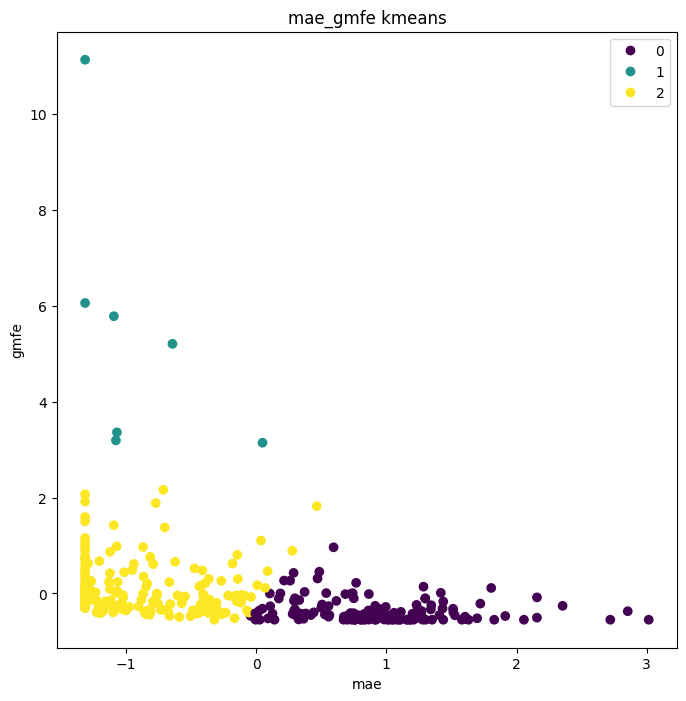

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler().fit(data)
    X_scaled = scaler.transform(data)
    return X_scaled

# report.trades['mae'] = report.trades['mae'][report.trades['mae'].notnull()]
scale_mae = scale_data((-report.trades['mae'].values).reshape(-1, 1))
scale_gmfe = scale_data(report.trades['gmfe'].values.reshape(-1, 1))


plt.figure(figsize = (8, 8))
random_state = 100
X = np.hstack((scale_mae,scale_gmfe))
X = X[~np.isnan(X).any(axis=1)]
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*scatter.legend_elements())
plt.title("mae_gmfe kmeans")
plt.xlabel("mae")
plt.ylabel("gmfe")

In [10]:
cluster_trades = report.trades.copy().head(354)
cluster_trades['group'] = y_pred
cluster_trades['stock_id'] = cluster_trades['stock_id'].apply(lambda s:s[:s.index(' ')])
# ana_targets = cluster_trades[cluster_trades['group'].isin([0,2])]
ana_targets = cluster_trades
ana_targets = ana_targets.reset_index().set_index(['stock_id', 'entry_sig_date'])

ValueError: Length of values (339) does not match length of index (348)

In [11]:

負債比率=data.get('fundamental_features:負債比率').deadline()
存貨週轉率=data.get('fundamental_features:存貨週轉率').deadline()
ROE稅後=data.get('fundamental_features:ROE稅後').deadline()
營收成長率=data.get('fundamental_features:營收成長率').deadline()
融資使用率=data.get('margin_transactions:融資使用率').fillna(0)
融券使用率=data.get('margin_transactions:融券使用率').fillna(0)

外陸資買賣超股數 = data.get('institutional_investors_trading_summary:外陸資買賣超股數(不含外資自營商)')	
外資自營商買賣超股數 = data.get('institutional_investors_trading_summary:外資自營商買賣超股數')
投信買賣超股數	= data.get('institutional_investors_trading_summary:投信買賣超股數')
自營商買賣超股數 = data.get('institutional_investors_trading_summary:自營商買賣超股數(自行買賣)')
自營商買賣超避險 = data.get('institutional_investors_trading_summary:自營商買賣超股數(避險)')
當日沖銷交易成交股數 = data.get('intraday_trading:當日沖銷交易成交股數')
當日沖銷交易買進成交金額 = data.get('intraday_trading:當日沖銷交易買進成交金額')
當日沖銷交易賣出成交金額 = data.get('intraday_trading:當日沖銷交易賣出成交金額')
集保人數 = data.get('inventory')
本益比	= data.get('price_earning_ratio:本益比')	
股價淨值比	= data.get('price_earning_ratio:股價淨值比')	
庫藏股買回總金額 = data.get('treasury_stock:本次已買回總金額')


close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

rsi = data.indicator('rsi', timeperiod = 20)
atr = data.indicator('atr', adjust_price=True, resample='D',timeperiod=10)
adosc = data.indicator("adosc",adjust_price=False, resample="D", fastperiod=3,slowperiod=10)
upper_band = close > data.indicator("bbands", timeperiod=10)[0]
sma10 = close > close.rolling(window=10).mean()
sma20 = close > close.rolling(window=20).mean()
sma60 = close > close.rolling(window=60).mean()
vol20 = volume > volume.rolling(window=20).mean()
vol60 = volume > volume.rolling(window=60).mean()
macd = close.ewm(span=12, adjust=False).mean() - close.ewm(span=26, adjust=False).mean()
vol_cumsum = volume.rolling(20).sum()
lower_shadow = (close-low)/(open-low)

pct_change = close.pct_change()
profit = pct_change.rolling(20).mean()
risk = pct_change.rolling(20).std()
sharpe = profit / risk * (252 ** 0.5)

sheep = (close - close.shift(5)) / close.shift(5) 

atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close


features={'負債比率':負債比率,'存貨週轉率':存貨週轉率,'ROE稅後':ROE稅後,'營收成長率':營收成長率,'融資使用率':融資使用率,'融券使用率':融券使用率,'entry_volatility':entry_volatility,
          '外陸資買賣超股數':外陸資買賣超股數, '外資自營商買賣超股數':外資自營商買賣超股數, '投信買賣超股數':投信買賣超股數, '自營商買賣超避險':自營商買賣超避險, '自營商買賣超股數':自營商買賣超股數, 'RSI':rsi, 'ADOSC':adosc,
          'ADOSC':adosc, '布林通道上緣':upper_band, '10日均線':sma10, '20日均線':sma20, 'sma60':sma60, 'vol20':vol20,'vol60':vol60, 'macd':macd, 'vol_cumsum':vol_cumsum, 'lower_shadow':lower_shadow, '夏普':sharpe, 'sheep':sheep}

def unstack_feat(col,feat):
    reindex_date = list(set(ana_targets.index.get_level_values(1)))
    df= feat.reindex(reindex_date,method='ffill')
    df = df.unstack().to_frame()
    df.columns=[col]
    df=df.replace(np.inf,np.nan)
    return df

feats_df = pd.concat([unstack_feat(k,v) for k,v in features.items()],axis=1)
dataset = pd.concat([feats_df,ana_targets[['group']]],axis=1)
dataset.index.names = ['stock_id','date']
dataset=dataset.dropna()
dataset

NameError: name 'ana_targets' is not defined

In [ ]:
test_select = dataset.index.get_level_values('date') > '2021'
dataset_train = dataset[~test_select]
dataset_test = dataset[test_select]
dataset_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# find high mae label
label = ana_targets[-ana_targets['mae']> ana_targets['gmfe']]['group'].values[0]
features_name = list(features.keys())
cf = DecisionTreeClassifier(max_depth=3)
cf.fit(dataset_train[features_name], dataset_train['group'] ==label)

In [ ]:
import pandas as pd
from sklearn import metrics
import seaborn as sns


prediction = cf.predict(dataset_test[features_name])
confusion_matrix = metrics.confusion_matrix(dataset_test['group'] == label, prediction)
tn, fp, fn, tp = confusion_matrix.ravel()
confusion_matrix=np.array([[tp, fp],[fn,tn]])



print('f1_score:',metrics.f1_score(dataset_test['group'] == label, prediction))
print('precision_score(p):',metrics.precision_score(dataset_test['group'] == label, prediction))
print('recall_score(p):',metrics.recall_score(dataset_test['group'] == label, prediction))


plt.figure(figsize=(10, 8))
sns.set(font_scale=2)

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(cf, fontsize=12,filled=True,)
plt.show()

In [ ]:
print(features_name[16],features_name[4], features_name[9])

In [ ]:
importance = pd.Series(cf.feature_importances_, index=features_name).sort_values(ascending=False)
importance

In [ ]:
condition1 = foreign_trust_surplus >= 499000
condition2 = invest_trust_surplus >= 499000
# condition2 = margin_buy < -1000000
# condition4 = (score > 6) & (score < 9.5)
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2

In [ ]:
負債比率=data.get('fundamental_features:負債比率').deadline()
存貨週轉率=data.get('fundamental_features:存貨週轉率').deadline()
ROE稅後=data.get('fundamental_features:ROE稅後').deadline()
營收成長率=data.get('fundamental_features:營收成長率').deadline()
融資使用率=data.get('margin_transactions:融資使用率').fillna(0)
融券使用率=data.get('margin_transactions:融券使用率').fillna(0)

外陸資買賣超股數 = data.get('institutional_investors_trading_summary:外陸資買賣超股數(不含外資自營商)')	
外資自營商買賣超股數 = data.get('institutional_investors_trading_summary:外資自營商買賣超股數')
投信買賣超股數	= data.get('institutional_investors_trading_summary:投信買賣超股數')
自營商買賣超股數 = data.get('institutional_investors_trading_summary:自營商買賣超股數(自行買賣)')
自營商買賣超避險 = data.get('institutional_investors_trading_summary:自營商買賣超股數(避險)')
當日沖銷交易成交股數 = data.get('intraday_trading:當日沖銷交易成交股數')
當日沖銷交易買進成交金額 = data.get('intraday_trading:當日沖銷交易買進成交金額')
當日沖銷交易賣出成交金額 = data.get('intraday_trading:當日沖銷交易賣出成交金額')
集保人數 = data.get('inventory')
本益比	= data.get('price_earning_ratio:本益比')	
股價淨值比	= data.get('price_earning_ratio:股價淨值比')	
庫藏股買回總金額 = data.get('treasury_stock:本次已買回總金額')


close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

rsi = data.indicator('rsi', timeperiod = 20)
atr = data.indicator('atr', adjust_price=True, resample='D',timeperiod=10)
adosc = data.indicator("adosc",adjust_price=False, resample="D", fastperiod=3,slowperiod=10)
upper_band = close > data.indicator("bbands", timeperiod=10)[0]
sma10 = close > close.rolling(window=10).mean()
sma20 = close > close.rolling(window=20).mean()
sma60 = close > close.rolling(window=60).mean()
vol20 = volume > volume.rolling(window=20).mean()
vol60 = volume > volume.rolling(window=60).mean()
macd = close.ewm(span=12, adjust=False).mean() - close.ewm(span=26, adjust=False).mean()
vol_cumsum = volume.rolling(20).sum()
lower_shadow = (close-low)/(open-low)

pct_change = close.pct_change()
profit = pct_change.rolling(20).mean()
risk = pct_change.rolling(20).std()
sharpe = profit / risk * (252 ** 0.5)

sheep = (close - close.shift(5)) / close.shift(5) 

atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close

In [12]:
condition1 = foreign_trust_surplus >= 499000
condition2 = invest_trust_surplus >= 499000
# condition2 = margin_buy < -1000000
# condition4 = (score > 6) & (score < 9.5)
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2

In [13]:
position= (conditions)
position=(position*(融資使用率<=20)*(投信買賣超股數<4000000)*(invest_trust_surplus)*(score>4)).is_largest(5)
# position = position.replace(0, np.NAN).rank(1, ascending=False, method='min')
# position = position <= 10

position

,0050,0056,0061,006205,006206,006207,00636,00639,00643,00878,...,8299,8358,8436,8454,8942,9904,9914,9938,9939,9945
date,,,,,,,,,,,,,,,,,,,,,
2012-05-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-05-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-05-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-05-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-05-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-06-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-06-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# position = position[position.index >= '2018-09-01']

In [14]:
report = sim(position, resample='Q', trade_at_price='close',stop_loss=0.05, touched_exit=False, position_limit=0.2, fee_ratio=1.425/1000*0.05,name="土洋對作且散戶空手", live_performance_start='2023-02-10', mae_mfe_window=60, upload=False)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

0.6707799653801297
-0.25377929402958443


--Stats--
annualized_rate_of_return     12.65%
sharpe                          0.67
max_drawdown                 -25.38%
win_ratio                     41.06%

--Latest Position--


2002    0.2
2609    0.2
2883    0.2
3231    0.2
4938    0.2
Name: 2023-06-30 00:00:00, dtype: float64

In [ ]:
report.trades['return'].max()